<a href="https://colab.research.google.com/github/HJyeoh/Climate-Model-Simulation-Outcome-Prediction/blob/main/CPC251_Project_Part_1_Group_Climate1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Group Information

Group No: Climate1

- Member 1: Chua Pei Jun 22304129
- Member 2: Liew Choy Yein 22303777
- Member 3: Loh Yi Han 22303435
- Member 4: Yeoh Hao Jing 22303904

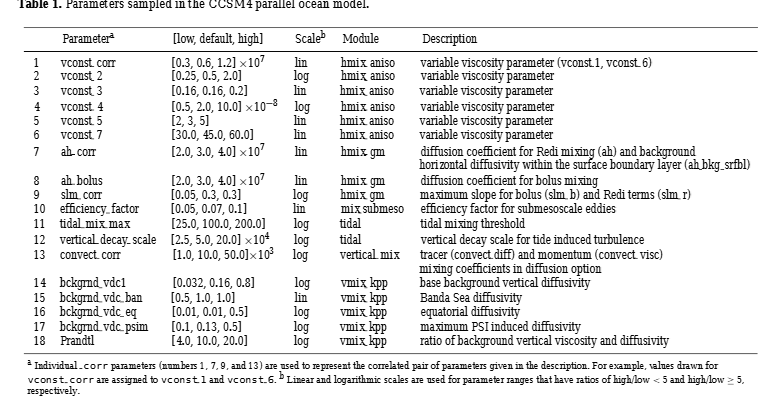


#### Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score     # for splitting
from sklearn.preprocessing import StandardScaler                          # for standardisation
from sklearn.model_selection import GridSearchCV                          # for fine-tuning
from sklearn.feature_selection import SelectKBest, f_classif              # for feature importance
from sklearn.svm import SVC                                               # for svm
from sklearn.neighbors import KNeighborsClassifier                        # for knn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report # for classification report
import matplotlib.pyplot as plt                                           # for graph plotting

#### Load the dataset

In [ ]:
# run in google colab to download csv file from drive
!pip install -q gdown
import gdown

file_id = "1HQR2t5mvqX06DmOIfO645UYUkWujDCWs"
url = f"https://drive.google.com/uc?id={file_id}"
output = "climate.csv"

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1HQR2t5mvqX06DmOIfO645UYUkWujDCWs
To: /content/climate.csv
100%|██████████| 190k/190k [00:00<00:00, 24.3MB/s]


'climate.csv'

In [ ]:
df = pd.read_csv('climate.csv')
df

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3,176,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,...,0.280546,0.384117,0.885948,0.768482,0.459479,0.334482,0.573002,0.610183,0.737706,1
536,3,177,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,...,0.798108,0.353546,0.044796,0.990900,0.347027,0.512499,0.810549,0.593332,0.142565,0
537,3,178,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,...,0.193103,0.829563,0.101506,0.548878,0.381966,0.198811,0.867108,0.461632,0.652817,1
538,3,179,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,...,0.761134,0.436714,0.690132,0.825133,0.981656,0.113193,0.364799,0.201469,0.536535,1


In [ ]:
# Check all null values in the dataset
df.apply(lambda x:sum (x.isnull()), axis=0)

,0
Study,0
Run,0
vconst_corr,0
vconst_2,0
vconst_3,0
vconst_4,0
vconst_5,0
vconst_7,0
ah_corr,0
ah_bolus,0


No null value presents in dataset.

#### Split the dataset
Split the dataset into training, validation and test sets.


**Clarification:** Since we will use GridSearchCV for hyperparameter tuning, we only need to split the dataset into training and test sets.

In [ ]:
# Target
X = df.drop(columns =['outcome','Study','Run'])
y = df['outcome']

# Split dataset to 80:20 ratio (Training: Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(432, 18)
(432,)
(108, 18)
(108,)


#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description:

Since all features are **numerical**, label encoding is not needed. We will standardize the data using StandardScaler(), which scales the features to have a mean of 0 and a standard deviation of 1.

The StandardScaler is fitted on the training data (X_train) to compute the mean and standard deviation. Then, it is used to transform the training (X_train) and test (X_test) data, ensuring consistent scaling. This prevents data leakage by scaling the test data based on the training set's statistics.

In [ ]:
# Showing data type of features
X.dtypes

,0
vconst_corr,float64
vconst_2,float64
vconst_3,float64
vconst_4,float64
vconst_5,float64
vconst_7,float64
ah_corr,float64
ah_bolus,float64
slm_corr,float64
efficiency_factor,float64


In [ ]:
# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:

Since all features in the dataset are numerical, we applied **ANOVA F-test** to measure the statistical relationship between each feature and the target variable.


**Feature Importance using ANOVA F-value**

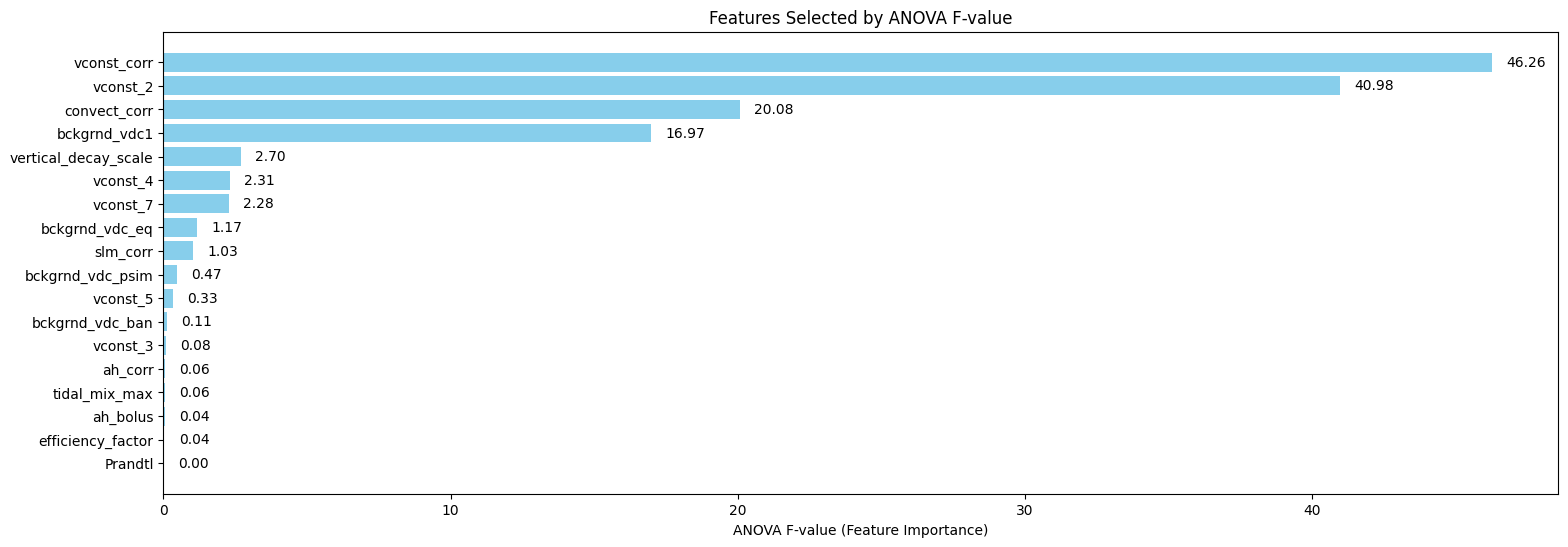

In [ ]:
# Show all 18 features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=18)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the scores of the selected features
feature_scores = selector.scores_

# Get the indices of features sorted by score in descending order
sorted_idx = np.argsort(feature_scores)[::-1]

# Feature names excluding 'outcome', 'Run', 'Study'
feature_names = df.drop(columns=['outcome','Run','Study']).columns.tolist()

# Plot features and their scores
plt.figure(figsize=(18, 6))
bars = plt.barh(
    [feature_names[i] for i in sorted_idx[:18]],
    feature_scores[sorted_idx[:18]],
    color='skyblue'
)
plt.xlabel('ANOVA F-value (Feature Importance)')
plt.title('Features Selected by ANOVA F-value')
plt.gca().invert_yaxis()  # Highest F-value on top

# Add value annotations
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center', fontsize=10)

plt.show()

In [ ]:
# Select top 11 features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=11)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

Based on the ANOVA F-test, we selected the **top 11 features** whose **F-values  > 0.3**. The F-value indicates the strength of the relationship between each feature and the target variable. A higher F-value suggests that the feature has a stronger ability to distinguish between classes, making it more relevant for the model. After testing various combinations of features, we found that using these **11 features yielded the most optimal results.**

#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description:

### **Support Vector Machine (SVM)**

`GridSearchCV` identified the best SVM hyperparameters as **`{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}`**, achieving a **cross-validation score of 95.84%** and **training accuracy of 98.38%**, indicating good generalisation without overfitting.


---


Let us look closer into these SVM hyperparameters:
1. **kernel**:
   Specifies the type of decision boundary used to separate classes.

   * `'linear'`: A straight line (or hyperplane) in feature space.
   * `'rbf'`: Radial basis function (non-linear, good for complex boundaries).
   * `'poly'`: Polynomial function, useful when the data is not linearly separable.
   * `'sigmoid'`: Similar to a neural network activation, less commonly used.
     Each kernel has its own set of required or optional parameters.
2. **C**:
   Regularization parameter that controls the trade-off between having a smooth decision boundary and classifying training points correctly.

   * A small `C` value allows more margin violations (softer margin, more generalization).
   * A large `C` tries to classify all training examples correctly (hard margin, may overfit).
3. **gamma** (only for `rbf`, `poly`, and `sigmoid` kernels):
   Controls how far the influence of a single training example reaches.

   * Low gamma: More generalized decision boundary (wider influence).
   * High gamma: Model focuses only on nearby points, can overfit.
4. **degree** (only for `poly` kernel):
   Sets the degree of the polynomial kernel.

   * Higher degree increases model complexity, useful for more complex decision boundaries.
5. **coef0** (for `poly` and `sigmoid` kernels):
   Controls how much influence the independent term has in the kernel function.

   * It adjusts the shape of the decision boundary.


---

*Note:*
`rank_test_score`: This value ranks each hyperparameter combination based on its cross-validation performance. A lower rank (e.g., 1) means the model performed better compared to others. It helps summarize the results at a glance and identify the best configuration easily.


In [ ]:
# SVM Hyperparameter Tuning with GridSearchCV
svm_param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1],
        'degree': [2, 3, 4],      # only for poly
        'coef0': [0.0, 0.1, 0.5]  # for poly and sigmoid
    },
    {
        'kernel': ['sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1],
        'coef0': [0.0, 0.1, 0.5]  # for poly and sigmoid
    }
]

# Create SVM GridSearchCV
svm_grid = GridSearchCV(SVC(class_weight='balanced'), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model to training data
svm_grid.fit(X_train_selected, y_train)

# Best parameters and best score
print("Best SVM Hyperparameters:", svm_grid.best_params_)
print("Best SVM Cross-validation Score:", svm_grid.best_score_)

# Predict on training set with best model
svm_best_train_pred = svm_grid.best_estimator_.predict(X_train_selected)
svm_train_accuracy = accuracy_score(y_train, svm_best_train_pred)
print("SVM Training Accuracy:", svm_train_accuracy)

# Predict on testing set with best model
svm_best_test_pred = svm_grid.best_estimator_.predict(X_test_selected)
svm_test_accuracy = accuracy_score(y_test, svm_best_test_pred)
print("SVM Testing Accuracy:", svm_test_accuracy)

# Show accuracy of every combination
svm_results = pd.DataFrame(svm_grid.cv_results_)
svm_accuracy_summary = svm_results[['params', 'mean_test_score', 'rank_test_score']]
svm_accuracy_summary = svm_accuracy_summary.sort_values(by='mean_test_score', ascending=False)

# Display all rows
print("SVM Hyperparameter Combinations with Accuracy:\n")
svm_accuracy_summary

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best SVM Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best SVM Cross-validation Score: 0.9583533814488104
SVM Training Accuracy: 0.9837962962962963
SVM Testing Accuracy: 0.9629629629629629
SVM Hyperparameter Combinations with Accuracy:



,params,mean_test_score,rank_test_score
13,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.958353,1
11,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.951430,2
14,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.951430,2
121,"{'C': 100, 'coef0': 0.5, 'degree': 4, 'gamma':...",0.951430,2
68,"{'C': 1, 'coef0': 0.5, 'degree': 4, 'gamma': 0...",0.951403,5
...,...,...,...
46,"{'C': 1, 'coef0': 0.0, 'degree': 3, 'gamma': 0...",0.412056,156
58,"{'C': 1, 'coef0': 0.1, 'degree': 4, 'gamma': 0...",0.412056,156
49,"{'C': 1, 'coef0': 0.0, 'degree': 4, 'gamma': 0...",0.412056,156
55,"{'C': 1, 'coef0': 0.1, 'degree': 3, 'gamma': 0...",0.412056,156


### **K-Nearest Neighbors (KNN)**

The hyperparameter tuning of the KNN model using `GridSearchCV` resulted in the best parameters: **`{'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}`**. The model achieved a **cross-validation score of 93.29%** and a **training accuracy of 94.44%**, indicating good generalization without overfitting.


---



Let us look closer into these KNN hyperparameters:

1. **n_neighbors**: Specifies the number of nearest neighbors to use for classification. A smaller value may lead to overfitting, while a larger value can result in underfitting. `GridSearchCV` tests multiple odd values (e.g. 5 to 23) to find the best `k` that balances bias and variance.

- k=5 as lower boundary: Compared to k = 1 or k = 3, a 5-neighbour vote is less likely to be swayed by a single mislabeled point or outlier

- k=23 as upper boundary: Based on Rule of Thumb, the optimal k will be $$k = \left\lfloor \sqrt{n} \right\rfloor$$ n = total number of samples in dataset

$$\sqrt{540} \approx 23$$

2. **weights**: Determines how the influence of neighbors is calculated.
   * `'uniform'`: All neighbors have equal weight (simple majority vote).
   * `'distance'`: Closer neighbors contribute more heavily (inverse of distance), which can improve performance if nearer neighbors are more relevant.
3. **metric**: Specifies the distance metric used to compute similarity between points.
   * `'euclidean'`: Straight-line distance (default for continuous features).
   * `'manhattan'`: Sum of absolute differences, which can be more robust in high-dimensional data or when features are not normally distributed.
4. **leaf_size**: Affects the speed of tree-based algorithms (`'ball_tree'`, `'kd_tree'`). It doesn't change the result but influences training and prediction time.
5. **algorithm**: Used to compute nearest neighbors.
   * `'ball_tree'`, `'kd_tree'`: Efficient tree-based methods for fast nearest neighbor search.
   * `'brute'`: Performs brute-force search (slower but exact).

In [ ]:
# KNN Hyperparameter Tuning with GridSearchCV
knn_param_grid = {
    'n_neighbors': list(range(5, 24, 2)),
    'weights': ['uniform', 'distance'],                 # Weight function used in prediction
    'metric': ['euclidean', 'manhattan'],               # Distance metrics
    'leaf_size': [20, 30],                              # Controls tree-building speed
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],     # Search algorithms
}

# Create the GridSearchCV object for KNN
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model to the training data
knn_grid.fit(X_train_selected, y_train)

# Best hyperparameters and CV score
print("Best KNN Hyperparameters:", knn_grid.best_params_)
print("Best KNN Cross-validation Score:", knn_grid.best_score_)

# Predict on training set
knn_best_train_pred = knn_grid.best_estimator_.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, knn_best_train_pred)
print("Training Accuracy:", train_accuracy)

# Predict on testing set
knn_best_test_pred = knn_grid.best_estimator_.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, knn_best_test_pred)
print("Testing Accuracy:", test_accuracy)

# Show accuracy of every combination
knn_results = pd.DataFrame(knn_grid.cv_results_)
knn_accuracy_summary = knn_results[['params', 'mean_test_score', 'rank_test_score']]
knn_accuracy_summary = knn_accuracy_summary.sort_values(by='mean_test_score', ascending=False)

# Display all rows
print("\n KNN Hyperparameter Combinations with Accuracy:\n")
knn_accuracy_summary

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best KNN Hyperparameters: {'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best KNN Cross-validation Score: 0.9329056402031541
Training Accuracy: 0.9444444444444444
Testing Accuracy: 0.9444444444444444

 KNN Hyperparameter Combinations with Accuracy:



,params,mean_test_score,rank_test_score
3,"{'algorithm': 'ball_tree', 'leaf_size': 20, 'm...",0.932906,1
2,"{'algorithm': 'ball_tree', 'leaf_size': 20, 'm...",0.932906,1
42,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'm...",0.932906,1
43,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'm...",0.932906,1
83,"{'algorithm': 'kd_tree', 'leaf_size': 20, 'met...",0.932906,1
...,...,...,...
235,"{'algorithm': 'brute', 'leaf_size': 30, 'metri...",0.914381,121
236,"{'algorithm': 'brute', 'leaf_size': 30, 'metri...",0.914381,121
237,"{'algorithm': 'brute', 'leaf_size': 30, 'metri...",0.914381,121
238,"{'algorithm': 'brute', 'leaf_size': 30, 'metri...",0.914381,121


#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
______________________________________________________________________________________
Description:

### **Prediction on Data with 11 Features (With features selection)**

The trained SVM and KNN models were evaluated on the **20% test set**.
Both SVM and KNN perform well overall, but SVM slightly outperforms KNN, especially in detecting the minority class (Class 0). SVM achieves higher recall (0.56 vs 0.33) and F1-score (0.71 vs 0.50) for Class 0, while both models perfectly recall Class 1. The overall accuracy and weighted F1-score are also slightly higher for **SVM, making it the more balanced and reliable model** in this comparison.


In [ ]:
# Define evaluation function
def evaluate_model(model, model_name, X_test, y_test):
    print(f"\n{model_name} Testing Accuracy: {accuracy_score(y_test, model.predict(X_test)):.4f}\n")

    # Classification Report with zero_division to suppress warning
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, model.predict(X_test), zero_division=0))

    # Confusion Matrix
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(X_test)))

In [ ]:
# Predict on test set for SVM (Feature Selection)
evaluate_model(svm_grid.best_estimator_, "SVM (With Feature Selection)", X_test_selected, y_test)


SVM (With Feature Selection) Testing Accuracy: 0.9630

SVM (With Feature Selection) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.96      1.00      0.98        99

    accuracy                           0.96       108
   macro avg       0.98      0.78      0.85       108
weighted avg       0.96      0.96      0.96       108

SVM (With Feature Selection) Confusion Matrix:
[[ 5  4]
 [ 0 99]]


In [ ]:
# Predict on test set for KNN (Feature Selection)
evaluate_model(knn_grid.best_estimator_, "KNN (With Feature Selection)", X_test_selected, y_test)


KNN (With Feature Selection) Testing Accuracy: 0.9444

KNN (With Feature Selection) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.94      1.00      0.97        99

    accuracy                           0.94       108
   macro avg       0.97      0.67      0.74       108
weighted avg       0.95      0.94      0.93       108

KNN (With Feature Selection) Confusion Matrix:
[[ 3  6]
 [ 0 99]]


### **Prediction on Data with All Features (Without features selection):**



In [ ]:
# Train using the known best parameters
svm_best_params_model = SVC(C= 100, gamma= 0.01, kernel= 'rbf')
svm_best_params_model.fit(X_train, y_train)  # Use full feature set

# Evaluate
evaluate_model(svm_best_params_model, "SVM (Without Feature Selection)", X_test, y_test)


SVM (Without Feature Selection) Testing Accuracy: 0.9444

SVM (Without Feature Selection) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.94      1.00      0.97        99

    accuracy                           0.94       108
   macro avg       0.97      0.67      0.74       108
weighted avg       0.95      0.94      0.93       108

SVM (Without Feature Selection) Confusion Matrix:
[[ 3  6]
 [ 0 99]]


In [ ]:
# Train KNN model with best hyperparameters
knn_best_params = {'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
knn_best = KNeighborsClassifier(**knn_best_params)
knn_best.fit(X_train, y_train)

# Evaluate
evaluate_model(knn_best, "KNN (Without Feature Selection)", X_test, y_test)


KNN (Without Feature Selection) Testing Accuracy: 0.9352

KNN (Without Feature Selection) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.93      1.00      0.97        99

    accuracy                           0.94       108
   macro avg       0.97      0.61      0.66       108
weighted avg       0.94      0.94      0.92       108

KNN (Without Feature Selection) Confusion Matrix:
[[ 2  7]
 [ 0 99]]


### **Prediction on Data with 11 Features (Without fine-tuning):**

In [ ]:
# Initialize SVM with default parameters (Without Fine-tuning)
svm_model = SVC() # default kernel='rbf', C=1.0

# Train SVM on training set with selected features
svm_model.fit(X_train_selected, y_train)

# Evaluate
evaluate_model(svm_model, "SVM (Without Fine-tuning)", X_test_selected, y_test)


SVM (Without Fine-tuning) Testing Accuracy: 0.9444

SVM (Without Fine-tuning) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.94      1.00      0.97        99

    accuracy                           0.94       108
   macro avg       0.97      0.67      0.74       108
weighted avg       0.95      0.94      0.93       108

SVM (Without Fine-tuning) Confusion Matrix:
[[ 3  6]
 [ 0 99]]


In [ ]:
# Predict on test set for KNN (Without Fine-tuning)
knn_model = KNeighborsClassifier() # default n_neighbors=5

# Train KNN on training set with selected features
knn_model.fit(X_train_selected, y_train)

# Evaluate
evaluate_model(knn_model, "KNN (Without fine-tuning)", X_test_selected, y_test)


KNN (Without fine-tuning) Testing Accuracy: 0.9352

KNN (Without fine-tuning) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.93      1.00      0.97        99

    accuracy                           0.94       108
   macro avg       0.97      0.61      0.66       108
weighted avg       0.94      0.94      0.92       108

KNN (Without fine-tuning) Confusion Matrix:
[[ 2  7]
 [ 0 99]]


### **Comparison**
**Table 1:** Performance Comparison of SVM and KNN Models on 20% Testing Dataset

| Model                               | Accuracy | Precision (0) | Recall (0) | F1-Score (0) | Precision (1) | Recall (1) | F1-Score (1) | Macro Avg F1 | Weighted Avg F1 | Confusion Matrix     |
| ----------------------------------- | -------- | ------------- | ---------- | ------------ | ------------- | ---------- | ------------ | ------------ | --------------- | -------------------- |
| **SVM (With Feature Selection & Fine-tuning)**    | 0.9630   | 1.00          | 0.56       | 0.71         | 0.96          | 1.00       | 0.98         | 0.85         | 0.96            | \[\[5, 4], \[0, 99]] |
| **KNN (With Feature Selection & Fine-tuning)**    | 0.9444   | 1.00          | 0.33       | 0.50         | 0.94          | 1.00       | 0.97         | 0.74         | 0.93            | \[\[3, 6], \[0, 99]] |
| **SVM (Without Feature Selection)** | 0.9444   | 1.00          | 0.33       | 0.50         | 0.94          | 1.00       | 0.97         | 0.74         | 0.93            | \[\[3, 6], \[0, 99]] |
| **KNN (Without Feature Selection)** | 0.9352   | 1.00          | 0.22       | 0.36         | 0.93          | 1.00       | 0.97         | 0.66         | 0.92            | \[\[2, 7], \[0, 99]] |
| **SVM (Without Fine-tuning)**       | 0.9444   | 1.00          | 0.33       | 0.50         | 0.94          | 1.00       | 0.97         | 0.74         | 0.93            | \[\[3, 6], \[0, 99]] |
| **KNN (Without Fine-tuning)**       | 0.9352   | 1.00          | 0.22       | 0.36         | 0.93          | 1.00       | 0.97         | 0.66         | 0.92            | \[\[2, 7], \[0, 99]] |

>The trained SVM and KNN models were evaluated on the 20% test set. The comparison of the six models reveals clear performance differences, with the **SVM model using feature selection and fine-tuning** emerging as the superior choice. It achieves the highest accuracy (96.30%) and maintains the best balance between precision and recall, particularly for the minority class (class 0), where it attains a recall of 0.56 which significantly better than all other models. While its F1-score for class 0 (0.71) is still limited due to class imbalance, it outperforms alternatives by a notable margin. The **KNN model with feature selection and fine-tuning** ranks second but struggles with class 0 recall (0.33), leading to a weaker macro F1-score (0.74).

>Notably, both models without feature selection or fine-tuning perform similarly, suggesting that these optimizations are more impactful for SVM than for KNN. All models exhibit difficulty in correctly classifying the minority class, as seen in their confusion matrices, but the fine-tuned SVM handles this challenge best.


### **Conclusion**

>In conclusion, the optimized SVM is the most effective model for this task, while KNN even with tuning also lags behind in minority-class performance. For imbalanced datasets, **SVM with feature selection and fine-tuning outperforms other models**.
